In [29]:
import pandas as pd
import numpy as np

In [30]:
file_name = 'seoul.csv'
seoul_data = pd.read_csv(file_name)
seoul_data.drop(['노선명','승차총승객수','하차총승객수'],axis=1,inplace=True)
seoul_data

,사용일자,역명,승하차객수
0,20240701,석촌고분,15079
1,20240701,도농,23135
2,20240701,구리,28138
3,20240701,길음,44902
4,20240701,복정,1
...,...,...,...
19098,20240731,신풍,22158
19099,20240731,대림(구로구청),18694
19100,20240731,남구로,31356
19101,20240731,가산디지털단지,94945


In [31]:
# 행의 수
count = seoul_data.shape[0]

# 승하차객수
df_total_count_of_people = seoul_data['승하차객수']
df_total_count_of_people

# 역 이름 뽑아내기
stations = set()
for station in seoul_data['역명']:
    stations.add(station)

print(stations)

{'범계', '안산', '개롱', '갈매', '중앙보훈병원', '새절(신사)', '인천공항1터미널', '명학', '경찰병원', '수내', '회기', '솔밭공원', '반월', '화서', '개봉', '연수', '여주', '남춘천', '도화', '디지털미디어시티', '약수', '상갈', '천호(풍납토성)', '광흥창(서강)', '신목동', '어천', '금곡', '신도림', '관악산(서울대)', '미아사거리', '공항화물청사', '강동', '뚝섬', '가락시장', '마들', '화곡', '삼양', '대성리', '구파발', '신둔도예촌', '곤지암', '오목천', '원종', '도봉', '압구정로데오', '옥수', '신길', '개화', '신촌', '의왕', '신포', '신금호', '부평', '증산(명지대앞)', '효창공원앞', '신반포', '덕정', '청명', '봉천', '쌍용(나사렛대)', '신정(은행정)', '신풍', '덕소', '당곡', '석수', '이천', '공덕', '병점', '매교', '신대방삼거리', '초월', '도농', '주엽', '태릉입구', '신방화', '솔샘', '백양리', '신내', '양주', '팔당', '홍제', '사릉', '녹양', '숭의', '시청', '신흥', '발산', '금정', '초지', '종합운동장', '검암', '대공원', '문산', '성환', '송파', '가좌', '곡산', '오산', '구리', '당정', '이대', '신정네거리', '역삼', '삼성(무역센터)', '청라국제도시', '마석', '아차산(어린이대공원후문)', '월계', '굽은다리(강동구민회관앞)', '버티고개', '명동', '동작(현충원)', '면목', '신용산', '경복궁(정부서울청사)', '증미', '등촌', '상수', '을지로입구', '용문', '광운대', '학여울', '야목', '일원', '평내호평', '상왕십리', '영등포구청', '온양온천', '가능', '도심', '야탑', '불광', '독립문', '세류', '망우', '천안', '중화', '압구정', '한티',

In [32]:
# 역별로 사람 몇명 내리는지 알기위해 dict 형태로 자료 만들기
station_person_data = dict()

for station in stations:
    station_person_data[station] = 0

station_person_data

{'범계': 0,
 '안산': 0,
 '개롱': 0,
 '갈매': 0,
 '중앙보훈병원': 0,
 '새절(신사)': 0,
 '인천공항1터미널': 0,
 '명학': 0,
 '경찰병원': 0,
 '수내': 0,
 '회기': 0,
 '솔밭공원': 0,
 '반월': 0,
 '화서': 0,
 '개봉': 0,
 '연수': 0,
 '여주': 0,
 '남춘천': 0,
 '도화': 0,
 '디지털미디어시티': 0,
 '약수': 0,
 '상갈': 0,
 '천호(풍납토성)': 0,
 '광흥창(서강)': 0,
 '신목동': 0,
 '어천': 0,
 '금곡': 0,
 '신도림': 0,
 '관악산(서울대)': 0,
 '미아사거리': 0,
 '공항화물청사': 0,
 '강동': 0,
 '뚝섬': 0,
 '가락시장': 0,
 '마들': 0,
 '화곡': 0,
 '삼양': 0,
 '대성리': 0,
 '구파발': 0,
 '신둔도예촌': 0,
 '곤지암': 0,
 '오목천': 0,
 '원종': 0,
 '도봉': 0,
 '압구정로데오': 0,
 '옥수': 0,
 '신길': 0,
 '개화': 0,
 '신촌': 0,
 '의왕': 0,
 '신포': 0,
 '신금호': 0,
 '부평': 0,
 '증산(명지대앞)': 0,
 '효창공원앞': 0,
 '신반포': 0,
 '덕정': 0,
 '청명': 0,
 '봉천': 0,
 '쌍용(나사렛대)': 0,
 '신정(은행정)': 0,
 '신풍': 0,
 '덕소': 0,
 '당곡': 0,
 '석수': 0,
 '이천': 0,
 '공덕': 0,
 '병점': 0,
 '매교': 0,
 '신대방삼거리': 0,
 '초월': 0,
 '도농': 0,
 '주엽': 0,
 '태릉입구': 0,
 '신방화': 0,
 '솔샘': 0,
 '백양리': 0,
 '신내': 0,
 '양주': 0,
 '팔당': 0,
 '홍제': 0,
 '사릉': 0,
 '녹양': 0,
 '숭의': 0,
 '시청': 0,
 '신흥': 0,
 '발산': 0,
 '금정': 0,
 '초지': 0,
 '종합운동장': 0,
 '검

In [33]:
for i in range(0,count):
    current = seoul_data.iloc[i]
    station = current['역명']
    station_person_data[station] = station_person_data[station] + current['승하차객수']

print(station_person_data)

{'범계': 1629136, '안산': 728600, '개롱': 401794, '갈매': 162691, '중앙보훈병원': 671483, '새절(신사)': 731387, '인천공항1터미널': 925825, '명학': 483263, '경찰병원': 455809, '수내': 833198, '회기': 1431436, '솔밭공원': 157405, '반월': 253946, '화서': 730129, '개봉': 1268086, '연수': 290622, '여주': 173155, '남춘천': 162598, '도화': 240140, '디지털미디어시티': 1854071, '약수': 987751, '상갈': 310985, '천호(풍납토성)': 2159352, '광흥창(서강)': 551509, '신목동': 251117, '어천': 83355, '금곡': 84073, '신도림': 3273773, '관악산(서울대)': 193895, '미아사거리': 1591434, '공항화물청사': 126472, '강동': 1078283, '뚝섬': 1495542, '가락시장': 1011033, '마들': 755085, '화곡': 1624306, '삼양': 128834, '대성리': 56504, '구파발': 1306488, '신둔도예촌': 86140, '곤지암': 134526, '오목천': 220950, '원종': 286058, '도봉': 352380, '압구정로데오': 1220250, '옥수': 540730, '신길': 774714, '개화': 140132, '신촌': 2368782, '의왕': 520461, '신포': 112189, '신금호': 396142, '부평': 1817046, '증산(명지대앞)': 581908, '효창공원앞': 606451, '신반포': 246995, '덕정': 335264, '청명': 266927, '봉천': 1420430, '쌍용(나사렛대)': 132609, '신정(은행정)': 731020, '신풍': 651130, '덕소': 317158, '당곡': 294780, '석수':

In [34]:
# 1. 각 지하철 역별 평균 이용객수
avg_person_data = dict()
for i in station_person_data:
    avg_person_data[i] = station_person_data[i]/31
print(avg_person_data) 


{'범계': 52552.77419354839, '안산': 23503.225806451614, '개롱': 12961.09677419355, '갈매': 5248.096774193548, '중앙보훈병원': 21660.74193548387, '새절(신사)': 23593.129032258064, '인천공항1터미널': 29865.322580645163, '명학': 15589.129032258064, '경찰병원': 14703.516129032258, '수내': 26877.354838709678, '회기': 46175.354838709674, '솔밭공원': 5077.580645161291, '반월': 8191.806451612903, '화서': 23552.548387096773, '개봉': 40906.0, '연수': 9374.90322580645, '여주': 5585.645161290323, '남춘천': 5245.096774193548, '도화': 7746.451612903225, '디지털미디어시티': 59808.74193548387, '약수': 31862.935483870966, '상갈': 10031.774193548386, '천호(풍납토성)': 69656.51612903226, '광흥창(서강)': 17790.612903225807, '신목동': 8100.548387096775, '어천': 2688.8709677419356, '금곡': 2712.032258064516, '신도림': 105605.58064516129, '관악산(서울대)': 6254.677419354839, '미아사거리': 51336.58064516129, '공항화물청사': 4079.7419354838707, '강동': 34783.32258064516, '뚝섬': 48243.290322580644, '가락시장': 32613.967741935485, '마들': 24357.58064516129, '화곡': 52396.967741935485, '삼양': 4155.935483870968, '대성리': 1822.709

In [35]:
# 2. 각 지하철 역별 이용객수의 표준 편차
station_data_Series=pd.Series(station_person_data)
for i in station_data_Series.index:
    data = seoul_data[seoul_data['역명'] == i]['승하차객수']
    
    print(f'{i}역의 표준편차 {data.std()}')
    print()

범계역의 표준편차 9151.648928689216

안산역의 표준편차 1278.9576670001609

개롱역의 표준편차 2860.678466784161

갈매역의 표준편차 1245.9714109839147

중앙보훈병원역의 표준편차 6825.849480554256

새절(신사)역의 표준편차 4882.304959353629

인천공항1터미널역의 표준편차 1426.5416546575564

명학역의 표준편차 4624.740279135939

경찰병원역의 표준편차 4213.136898408498

수내역의 표준편차 7211.623522935674

회기역의 표준편차 7077.440019990219

솔밭공원역의 표준편차 868.0417337967702

반월역의 표준편차 1390.0193144786354

화서역의 표준편차 2118.34893000358

개봉역의 표준편차 7568.5191330052585

연수역의 표준편차 999.9059740741864

여주역의 표준편차 560.886652149202

남춘천역의 표준편차 829.0212443936006

도화역의 표준편차 1355.5441180256653

디지털미디어시티역의 표준편차 12727.051739995399

약수역의 표준편차 9523.005591668123

상갈역의 표준편차 1936.3768350483406

천호(풍납토성)역의 표준편차 6084.171425289637

광흥창(서강)역의 표준편차 4540.834524456339

신목동역의 표준편차 2206.7806693418006

어천역의 표준편차 304.508756517278

금곡역의 표준편차 526.2405333350247

신도림역의 표준편차 46553.052962567795

관악산(서울대)역의 표준편차 1016.3338489261876

미아사거리역의 표준편차 8556.876804746747

공항화물청사역의 표준편차 1038.4615533805104

강동역의 표준편차 7438.9899869408655

뚝섬역의 표준편차 1

In [36]:
# 3. 가장 많은 이용객이 있는 역의 이용객 수

station_data_Series.max()


5993237

In [37]:
# 4. 가장 많은 이용객이 있는 역의 이용객 수
station_data_Series.min()

1

In [38]:
# 5. 이용객 수가 가장 많은 역의 이름
max_station = ''
max_station_num = 0
for i in station_data_Series.index:
    if max_station_num < station_data_Series[i]:
        max_station_num = station_data_Series[i]
        max_station = i
print(max_station)

잠실(송파구청)


In [39]:
# 6. 이용객 수가 가장 적은 역의 이름
min_station = ''
min_station_num = 999999999999999
for i in station_data_Series.index:
    if min_station_num > station_data_Series[i]:
        min_station_num = station_data_Series[i]
        min_station = i
print(min_station)

까치울


<Axes: >

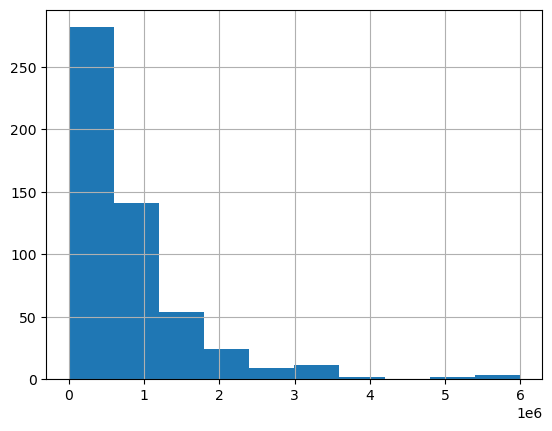

In [40]:
station_data_Series.hist()